#### 1. Import the dependecies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

#### 2. Load the Dataset

In [2]:
# Load Solar analysis dataset
df1 = pd.read_csv("../data/benin_clean.csv")
df2 = pd.read_csv("../data/sierraleone_clean.csv")
df3 = pd.read_csv("../data/togo_clean.csv")

In [3]:
# Add a column to identify country
df1['Country'] = 'Benin'
df2['Country'] = 'Sierra Leone'
df3['Country'] = 'Togo'

In [4]:
# Concatenate all data
df = pd.concat([df1, df2, df3], ignore_index=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553653 entries, 0 to 1553652
Data columns (total 19 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1553653 non-null  object 
 1   GHI            1553653 non-null  float64
 2   DNI            1553653 non-null  float64
 3   DHI            1553653 non-null  float64
 4   ModA           1553653 non-null  float64
 5   ModB           1553653 non-null  float64
 6   Tamb           1553653 non-null  float64
 7   RH             1553653 non-null  float64
 8   WS             1553653 non-null  float64
 9   WSgust         1553653 non-null  float64
 10  WSstdev        1553653 non-null  float64
 11  WD             1553653 non-null  float64
 12  WDstdev        1553653 non-null  float64
 13  BP             1553653 non-null  int64  
 14  Cleaning       1553653 non-null  int64  
 15  Precipitation  1553653 non-null  float64
 16  TModA          1553653 non-null  float64
 17  TModB   

In [6]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin


In [7]:
df.tail()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
1553648,2022-10-24 23:56:00,-0.8,0.0,0.0,0.0,0.0,25.2,53.8,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,Togo
1553649,2022-10-24 23:57:00,-0.9,0.0,0.0,0.0,0.0,25.3,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.3,24.0,Togo
1553650,2022-10-24 23:58:00,-1.0,0.0,0.0,0.0,0.0,25.3,53.4,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.2,23.9,Togo
1553651,2022-10-24 23:59:00,-1.1,0.0,0.0,0.0,0.0,25.4,53.5,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,Togo
1553652,2022-10-25 00:00:00,-1.2,0.0,0.0,0.0,0.0,25.4,52.3,0.0,0.0,0.0,0.0,0.0,977,0,0.0,24.1,23.8,Togo


### I. Metric Comparison - Boxplots

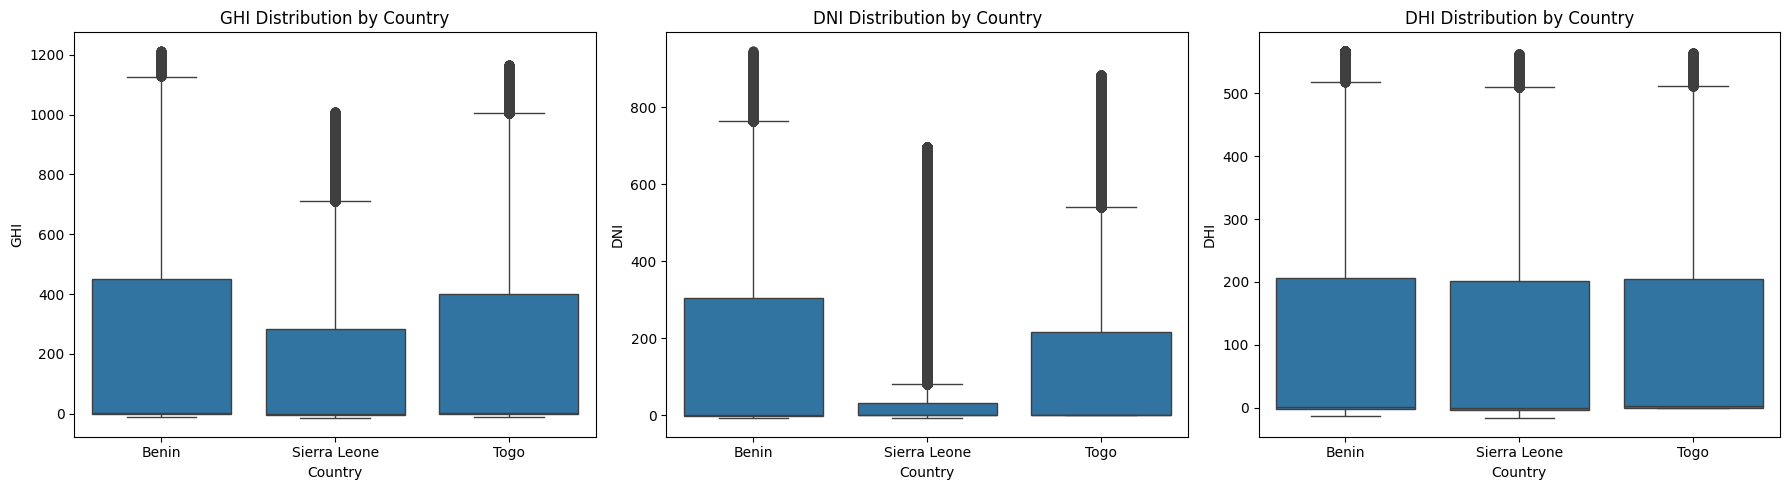

In [8]:
metrics = ['GHI', 'DNI', 'DHI']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, metric in enumerate(metrics):
    sns.boxplot(data=df, x='Country', y=metric, ax=axes[i])
    axes[i].set_title(f'{metric} Distribution by Country')
plt.tight_layout()
plt.show()

### II. Summary Table: mean, median, std

In [9]:
summary_table = df.groupby('Country')[metrics].agg(['mean', 'median', 'std']).round(2)
summary_table.columns = ['_'.join(col) for col in summary_table.columns]
summary_table.reset_index(inplace=True)

In [10]:
summary_table

,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,229.79,1.8,325.34,163.64,-0.1,260.81,107.87,1.6,149.81
1,Sierra Leone,162.97,-0.4,258.74,87.91,-0.1,179.88,99.62,-0.6,149.19
2,Togo,215.79,2.0,312.86,143.04,0.0,244.05,108.76,2.5,148.67


### III. Statistical Testing

In [11]:
ghi_values = [group['GHI'].dropna().values for name, group in df.groupby('Country')]
anova_result = f_oneway(*ghi_values)
kruskal_result = kruskal(*ghi_values)

anova_p = anova_result.pvalue
kruskal_p = kruskal_result.pvalue

In [12]:
print(f"ANOVA p-value: {anova_p:.2e}")
print(f"Kruskal–Wallis p-value: {kruskal_p:.2e}")

ANOVA p-value: 0.00e+00
Kruskal–Wallis p-value: 0.00e+00


### IV. Bar chart of average GHI

C:\Users\Tegbabu\AppData\Local\Temp\ipykernel_240\4209379875.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')


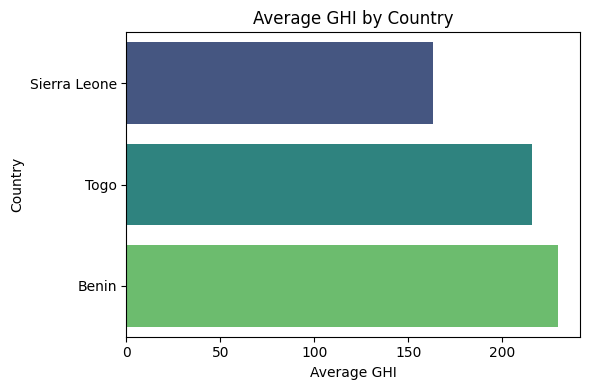

In [13]:
avg_ghi = df.groupby('Country')['GHI'].mean().sort_values()
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.values, y=avg_ghi.index, palette='viridis')
plt.xlabel('Average GHI')
plt.title('Average GHI by Country')
plt.tight_layout()
plt.show()